In [1]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set_context("talk")

In [2]:
def font_setting():
    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'bold',
                'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'weight': 'bold'}
    return title_font, axis_font


In [3]:
ax_order = 'first'
ax_order_str = 'axF'

In [4]:
with open('../../results/reg_results_mlp.P', 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/reg_%s_results_rnn.P' %(ax_order_str), 'rb') as f:
    rnn_results = pickle.load(f)

with open('../../results/reg_results_stepwisemlp.P', 'rb') as f:
    swmlp_results = pickle.load(f)


In [5]:
# categorical
# MLP
reg_results_mlp =  mlp_results['reg_results']
cat_regs = reg_results_mlp['cat_regs']
param_mlp = cat_regs['params']
p_val_mlp = cat_regs['p_vals']
# RNN
reg_results_rnn =  rnn_results['reg_results']
cat_regs = reg_results_rnn['cat_regs']
param_rnn = cat_regs['params']
p_val_rnn = cat_regs['p_vals']
# Stepwise MLP
reg_results_swmlp = swmlp_results['reg_results']
cat_regs = reg_results_swmlp['cat_regs']
params, p_val = cat_regs['params'], cat_regs['p_vals']


In [6]:
runs, checkpoints, ncoef = param_mlp.shape
print('runs, checkpoints, ncoef: ', runs, checkpoints, ncoef)

runs, checkpoints, ncoef:  20 21 3


In [7]:
param_swmlp = np.zeros([runs, checkpoints, 2, ncoef])
p_val_swmlp = np.zeros([runs, checkpoints, 2, ncoef])
for r in range(runs):
    for cp in range(checkpoints):
        param_swmlp[r,cp,:,:] = params[r,cp]
        p_val_swmlp[r,cp,:,:] = p_val[r,cp]
print(param_swmlp.shape, p_val_swmlp.shape)

(20, 21, 2, 3) (20, 21, 2, 3)


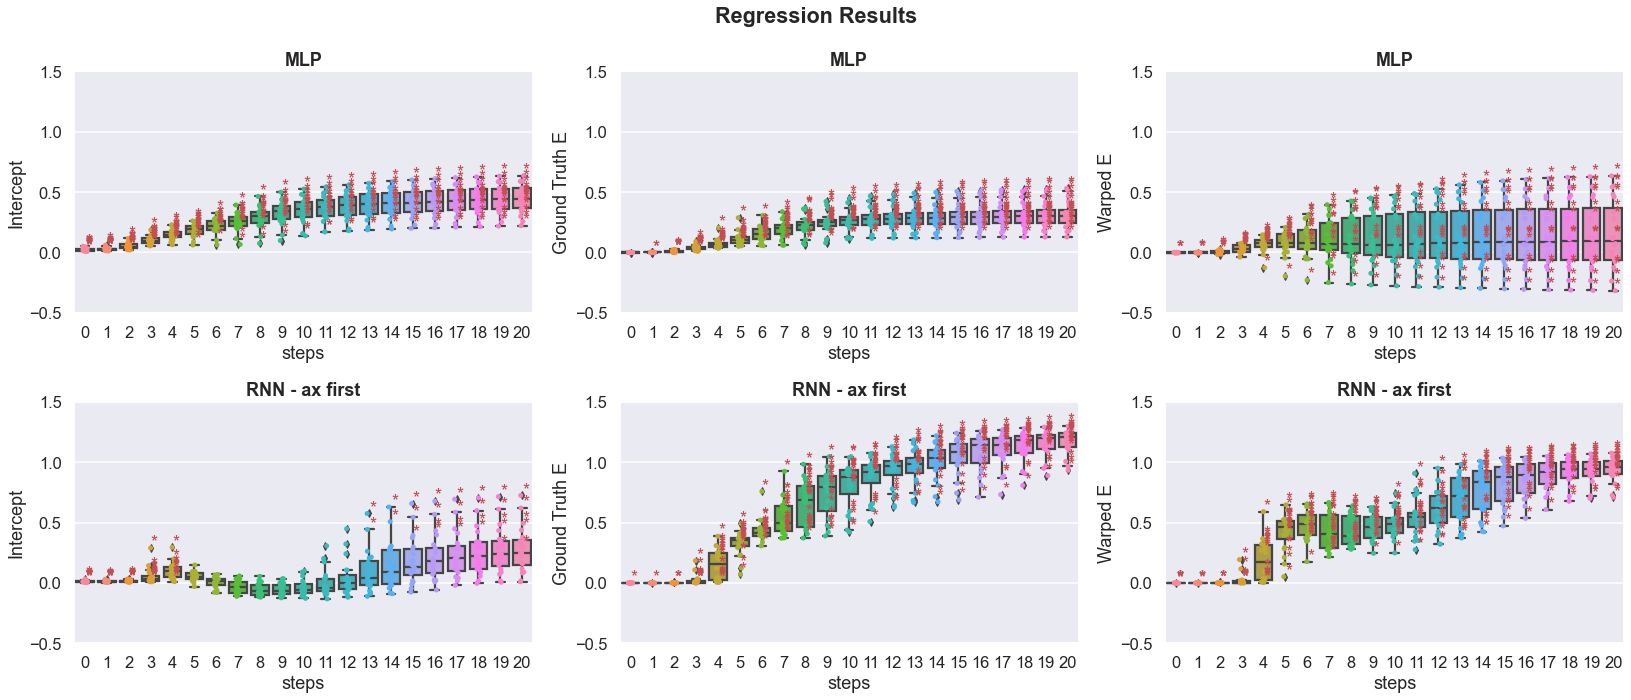

In [8]:
fig, axs = plt.subplots(2, ncoef, figsize=(23,10))
val_names = ['Intercept', 'Ground Truth E','Warped E']
for coef in range(ncoef):
    val_name = val_names[coef]
    # MLP
    val = param_mlp[:,:,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[0][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_mlp[run,:,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_mlp[run, i, coef]), color='r')
    ax.set_title('MLP', fontweight='bold')
    ax.set_ylim([-0.5, 1.5])
    # RNN
    val = param_rnn[:,:,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[1][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_rnn[run,:,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_rnn[run, i, coef]), color='r')
    ax.set_title('RNN - ax %s' %(ax_order), fontweight='bold')
    ax.set_ylim([-0.5, 1.5])

fig_str = '%s_reg_results_both_models_hidds' %(ax_order_str)
fig.suptitle('Regression Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)

# Including Stepwise MLP

In [31]:
mi, mx = [], []

for coef in range(ncoef):
    mi.append(min(min(np.min(param_mlp[:,:,coef], axis=0)), 
              min(np.min(param_rnn[:,:,coef], axis=0)),
              min(np.min(param_swmlp[:,:,0,coef], axis=0)),
              min(np.min(param_swmlp[:,:,1,coef], axis=0)),))
    mx.append(max(max(np.max(param_mlp[:,:,coef], axis=0)), 
              max(np.max(param_rnn[:,:,coef], axis=0)),
              max(np.max(param_swmlp[:,:,0,coef], axis=0)),
              max(np.max(param_swmlp[:,:,1,coef], axis=0)),))

mi = min(mi) - 0.1
mx = max(mx) + 0.1
print(mi, mx)

-0.5955878842517563 2.5203640666001803


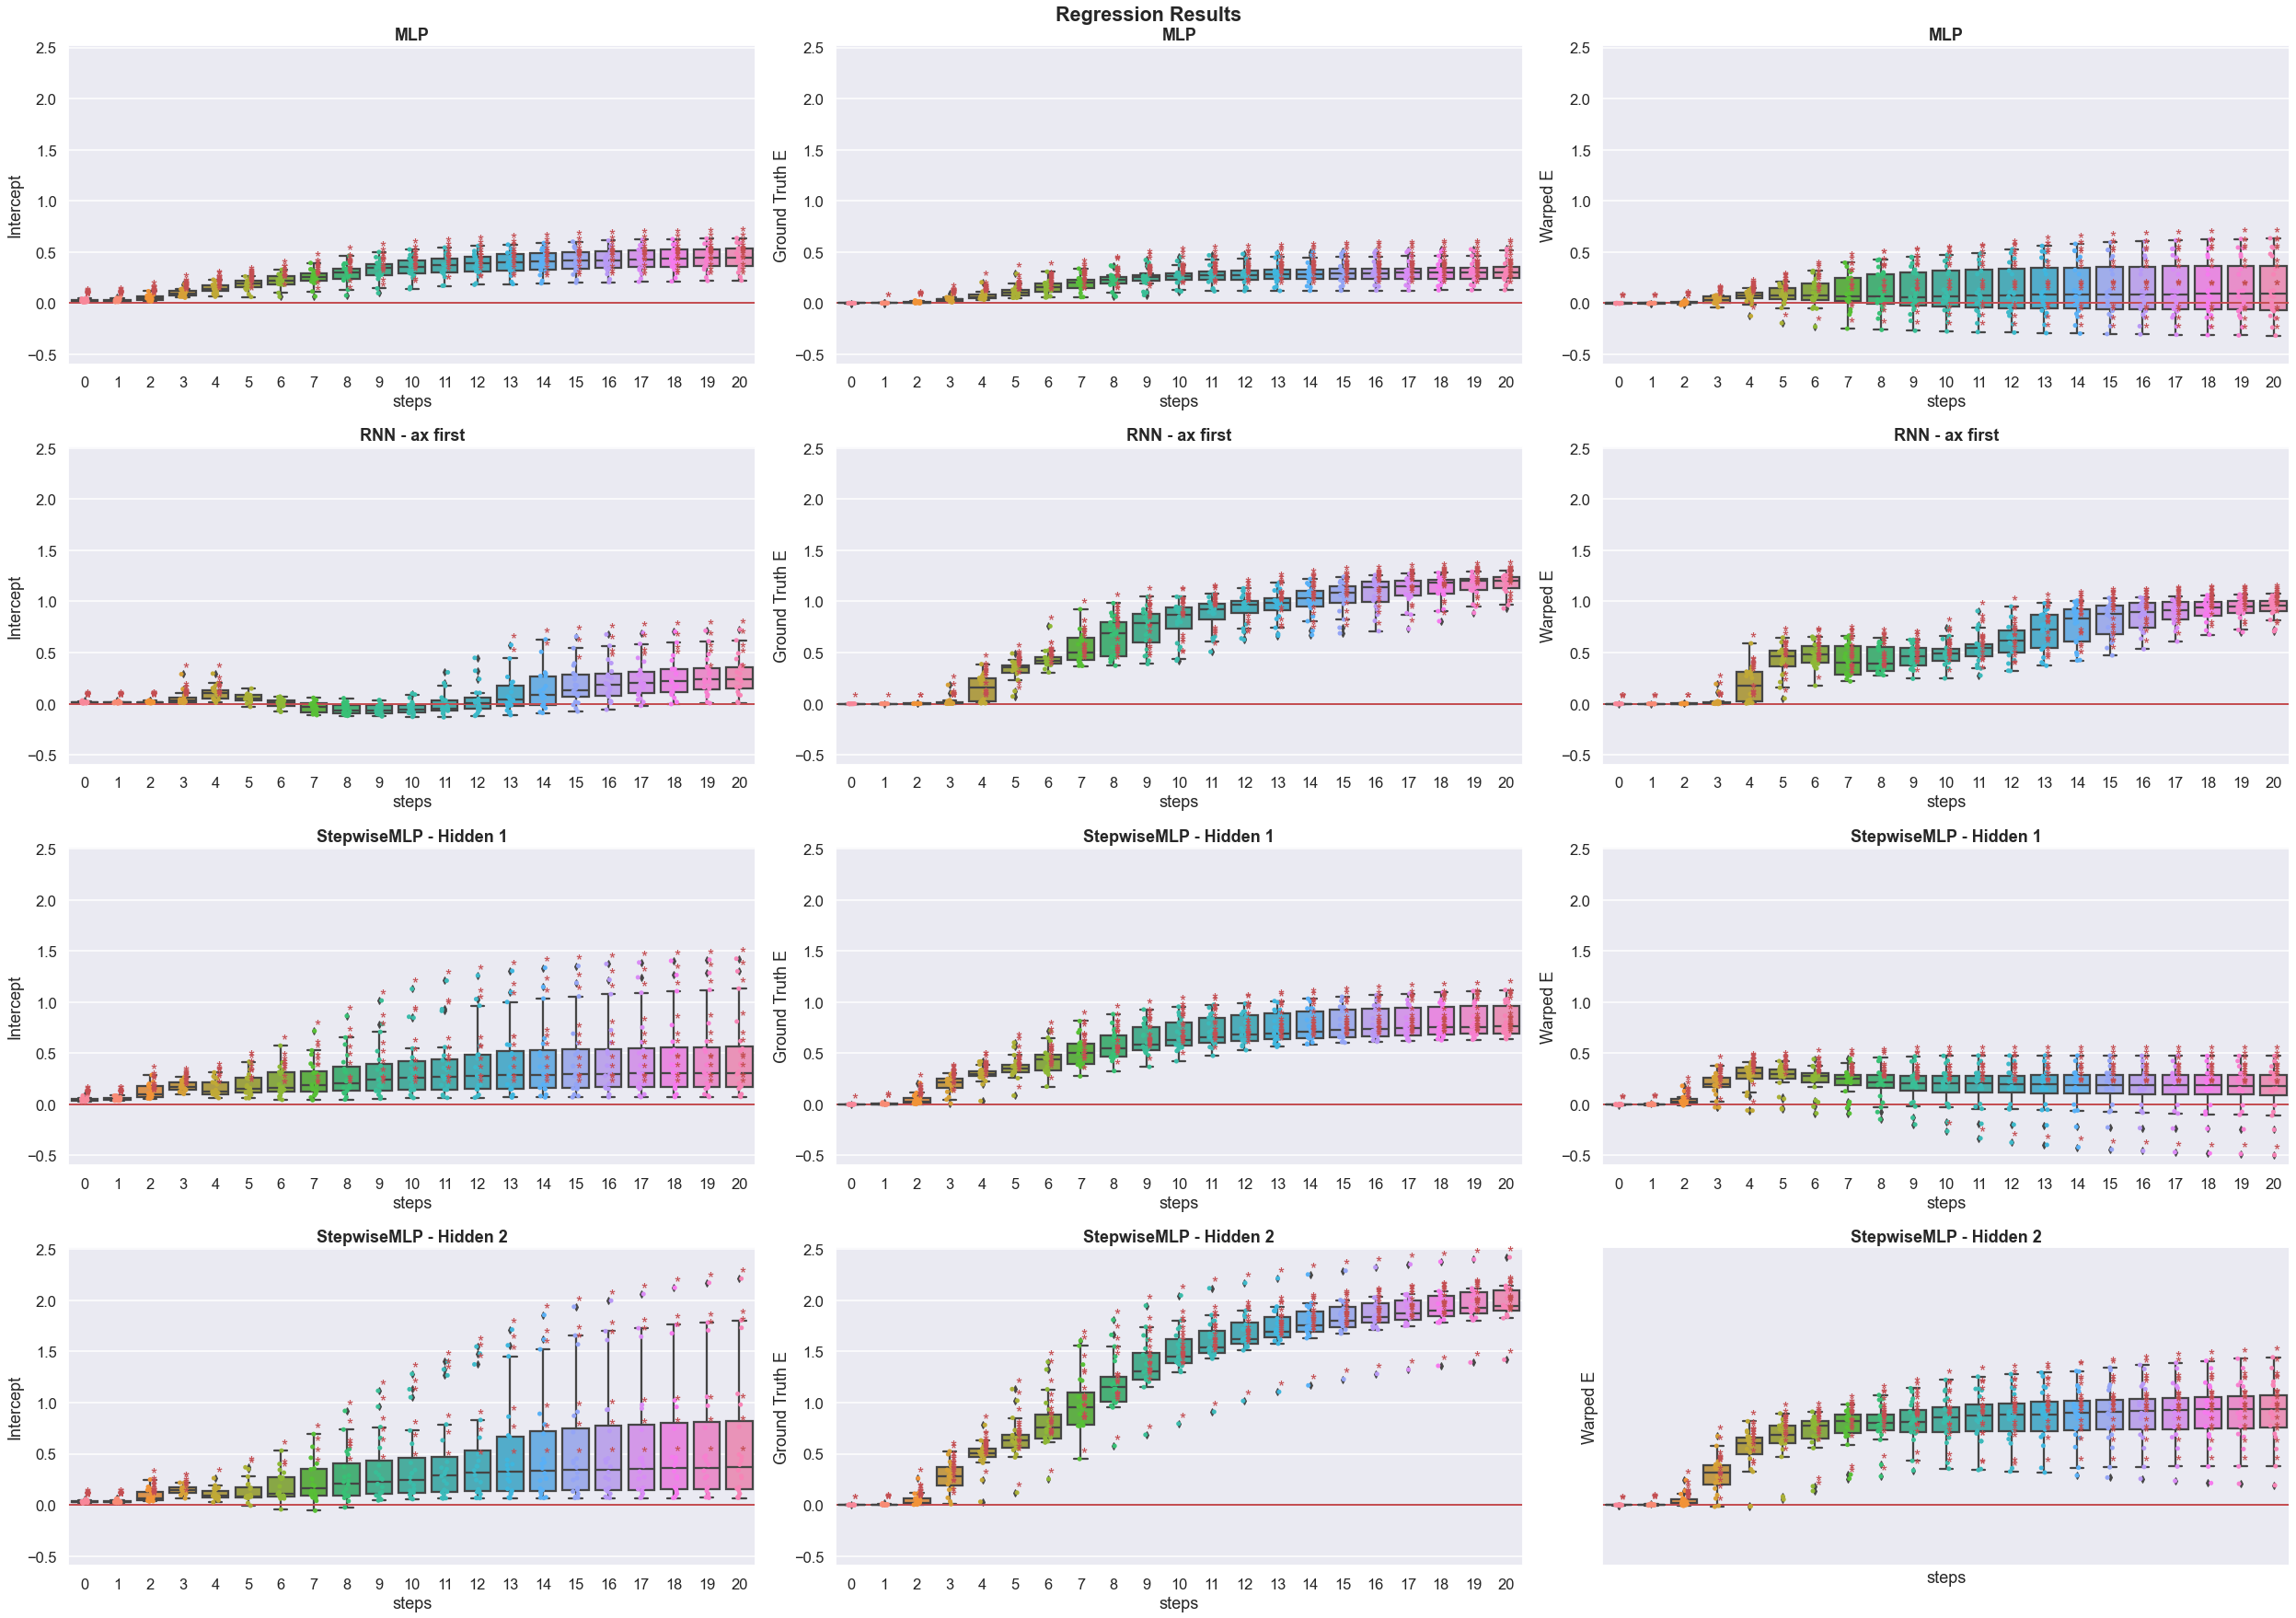

In [36]:
fig, axs = plt.subplots(4, ncoef, figsize=(35,25))
val_names = ['Intercept', 'Ground Truth E','Warped E']
for coef in range(ncoef):
    val_name = val_names[coef]
    # MLP
    val = param_mlp[:,:,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[0][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_mlp[run,:,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_mlp[run, i, coef]), color='r')
    ax.set_title('MLP', fontweight='bold')
    # RNN
    val = param_rnn[:,:,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[1][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_rnn[run,:,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_rnn[run, i, coef]), color='r')
    ax.set_title('RNN - ax %s' %(ax_order), fontweight='bold')
    # Stepwise MLP - Hidden 1
    val = param_swmlp[:,:,0,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[2][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_swmlp[run,:,0,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_swmlp[run,i,0,coef]), color='r')
    ax.set_title('StepwiseMLP - Hidden 1', fontweight='bold')
    # Stepwise MLP - Hidden 2
    val = param_swmlp[:,:,1,coef]
    df = pd.DataFrame(val, columns= np.arange(checkpoints))
    df.insert(0, 'runs', np.arange(runs))
    df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
    # plot
    ax = axs[3][coef]
    ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
    ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
    for run in range(runs):
        for i, p in enumerate(p_val_swmlp[run,:,1,coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (i, param_swmlp[run,i,1,coef]), color='r')
    ax.set_title('StepwiseMLP - Hidden 2', fontweight='bold')
for ax in axs.flatten():
    ax.set_ylim([mi, mx])
    ax.axhline(y=0, color='r', linewidth=2)

fig_str = '%s_reg_results_three_models_hidds' %(ax_order_str)
fig.suptitle('Regression Results', fontweight='bold')
plt.tight_layout()
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)